# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [3]:
#create dummy variables for Day.
days = tips['day']
daycols = pd.get_dummies(days, drop_first=True)
tips = pd.concat((tips, daycols), axis=1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1


In [4]:
#convert sex, time and smoker to integer fields
tips['sex_int'] = np.nan
tips.loc[tips['sex'] == 'Male', 'sex_int'] = 1
tips.loc[tips['sex'] == 'Female', 'sex_int'] = 0
tips['smoker_int'] = np.nan
tips.loc[tips['smoker'] == 'No', 'smoker_int'] = 0
tips.loc[tips['smoker'] == 'Yes', 'smoker_int'] = 1
tips['time_int'] = np.nan
tips.loc[tips['time'] == 'Lunch', 'time_int'] = 0
tips.loc[tips['time'] == 'Dinner', 'time_int'] = 1
tips = tips.drop(columns=['day', 'sex','smoker','time'])

In [5]:
tips.head()

,total_bill,tip,size,Fri,Sat,Sun,sex_int,smoker_int,time_int
0,16.99,1.01,2,0,0,1,0.0,0.0,1.0
1,10.34,1.66,3,0,0,1,1.0,0.0,1.0
2,21.01,3.50,3,0,0,1,1.0,0.0,1.0
3,23.68,3.31,2,0,0,1,1.0,0.0,1.0
4,24.59,3.61,4,0,0,1,0.0,0.0,1.0


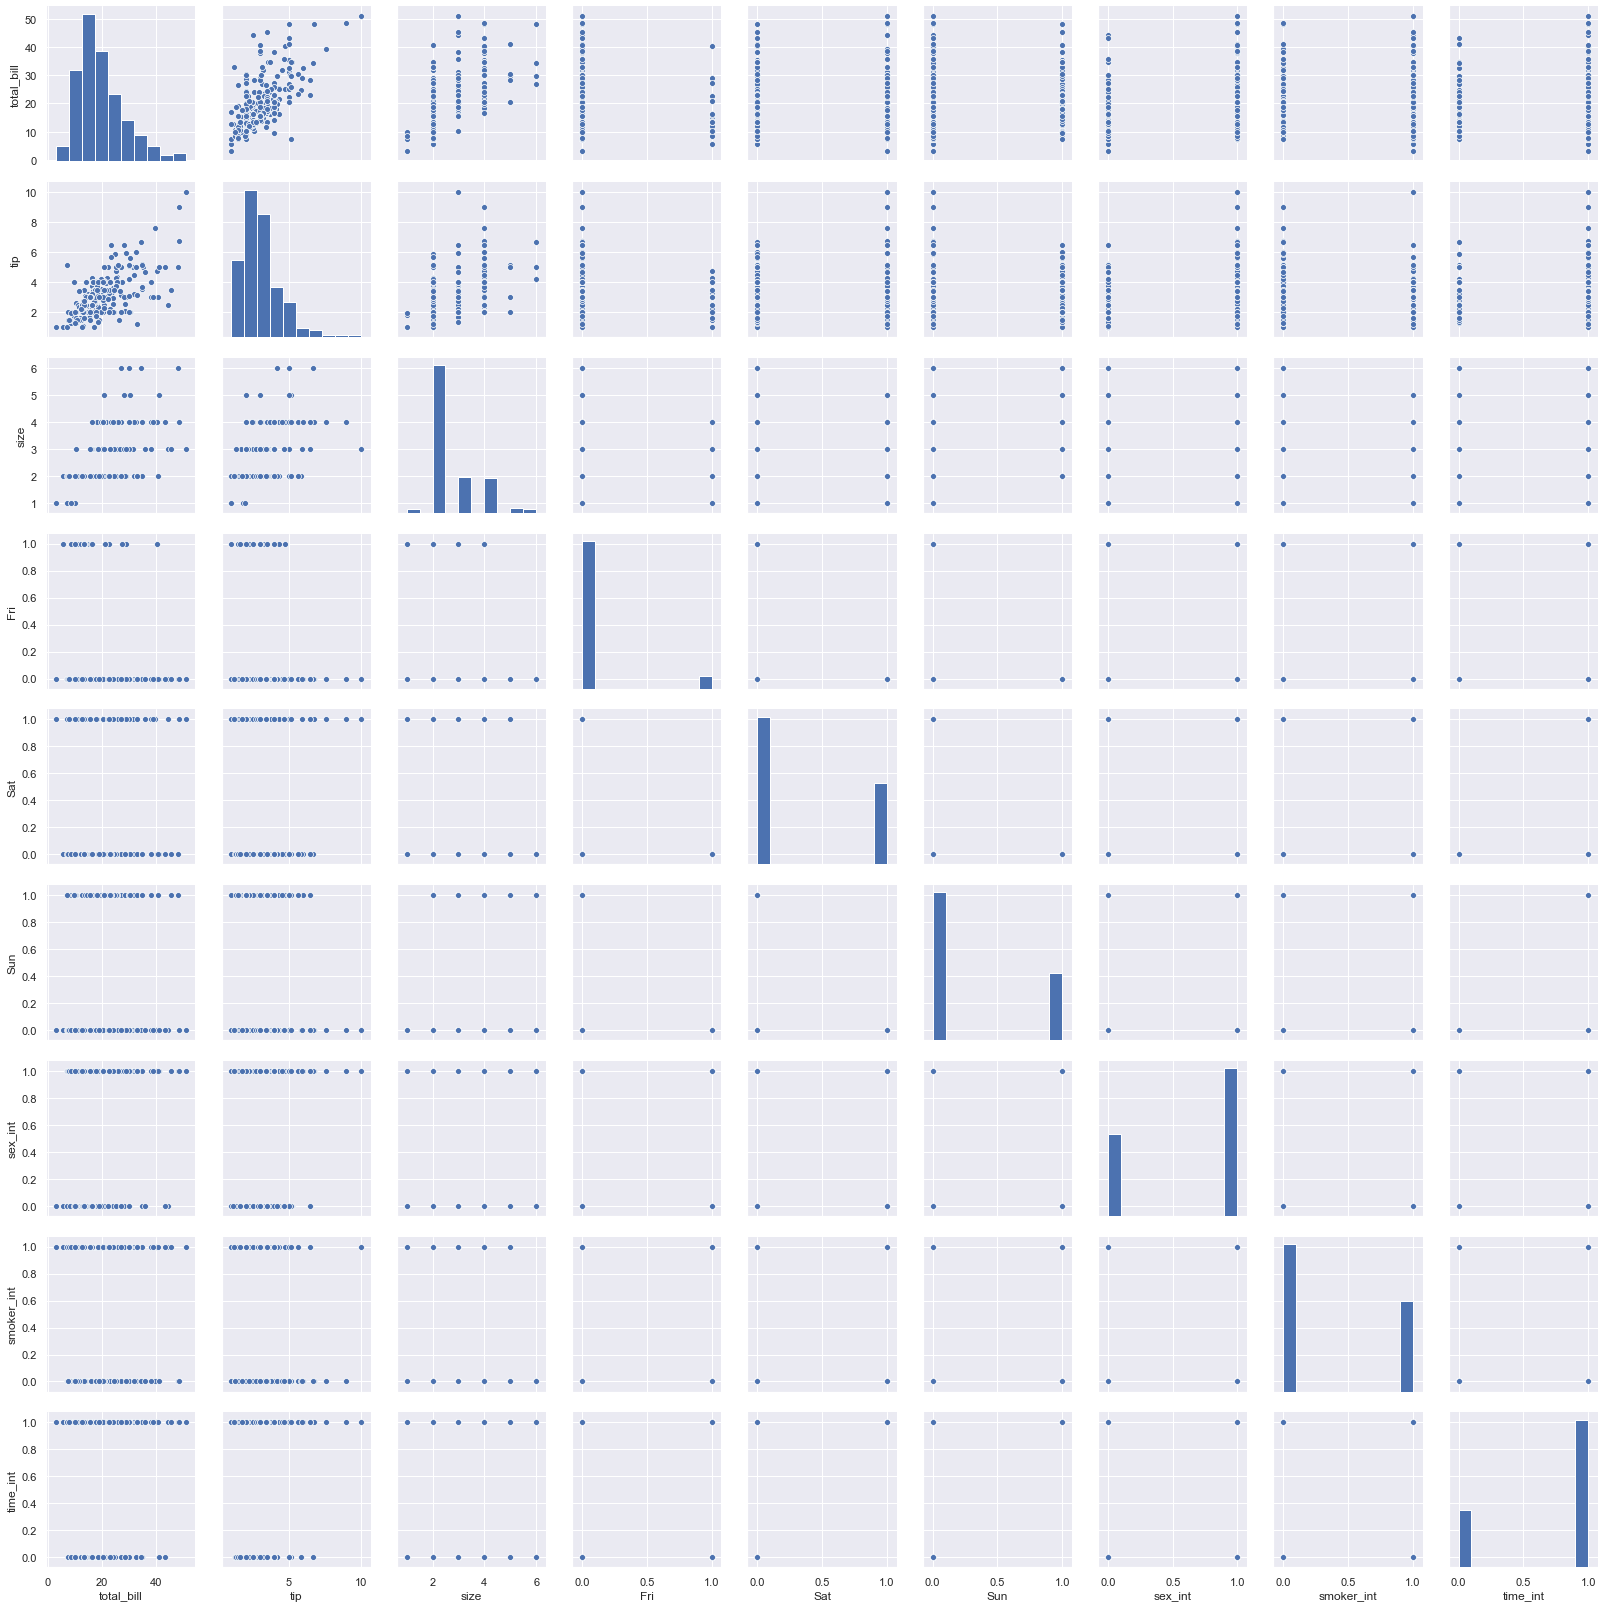

In [6]:
sns.pairplot(tips)
plt.show()

In [7]:
x = sm.add_constant(tips.iloc[:,[0,2,3,4,5,6,7,8]])
y = tips.tip

lm = sm.OLS(y, x).fit()

lm.summary()

C:\Users\Rachel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.20e-28
Time:                        18:18:24   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7097      0.232      3.054      0.003       0.252       1.167
total_bill     0.0945      0.010      9.841      0.000       0.076       0.113
size           0.1760      0.090      1.966      0.051      -0.000       0.352
Fri            0.1623      0.393      0.412      0.680      -0.613       0.937
Sat            0.0408      0.471      0.087      0.931      -0.886       0.968
Sun            0.1368      0.472      0.290      0.772      -0.793       1.066
sex_int       -0.0324      0.142     -0.229      0.819      -0.311       0.247
smoker_int    -0.0864      0.147     -0.589      0.556      -0.375       0.202
time_int      -0.0681      0.445     -0.153      0.878      -0.944       0.808
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#keep total_bill and size as independent variables
x_revised = sm.add_constant(tips.iloc[:,[0,2]])
lm_revised = sm.OLS(y, x_revised).fit()

lm_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.67e-34
Time:                        18:18:24   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

Based on the summaries, the linear function is 
**Tip(Total_bill, Size) = .6689 + .0927Total_bill + .1926Size**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

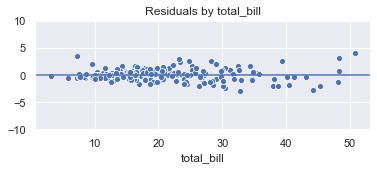

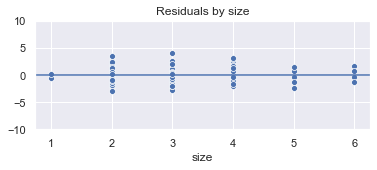

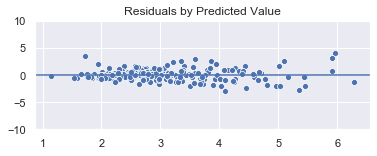

-1.9456203497119547e-15


In [9]:
for x in ('total_bill', 'size'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips[x], lm_revised.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-10, 10)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm_revised.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm_revised.predict(), lm_revised.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-10, 10)
plt.axhline(np.mean(lm_revised.resid))
plt.show()

print(np.mean(lm_revised.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

1. The scatterplots above show that residuals against each predictor variable and the predicted values have a mean close to 0 across the distribution and the calculation shows the mean to the residuals against the predicted values is -1.9456203497119547e-15, which is very close to 0;
2. The plots show the vertical spread of the points approximately keep constant across the distribution; 
3. My model meets the assumption of normality because the plots indicate the points tend to be closer to 0 on the y axis, with fewer spreading out progressively; 
4. My model meets the assumpption of independency because the first two plots against the predictors seem to be distributed randomly without significant paterns between each predictor variable and residuals.